<a href="https://colab.research.google.com/github/rucha0209/FBprophet/blob/main/FB_Prophet_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Use of FBprophet**

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from fbprophet import Prophet
plt.style.use('fivethirtyeight')

In [ ]:
df = wb.DataReader('GC=F', data_source='yahoo', start='2016-1-1')

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,1082.500000,1063.199951,1063.400024,1075.099976,143.0,1075.099976
2016-01-05,1081.500000,1075.300049,1075.599976,1078.400024,82.0,1078.400024
2016-01-06,1093.699951,1081.599976,1081.599976,1091.900024,52.0,1091.900024
2016-01-07,1109.400024,1091.599976,1091.599976,1107.699951,122.0,1107.699951
2016-01-08,1111.099976,1093.000000,1111.099976,1097.800049,98.0,1097.800049
...,...,...,...,...,...,...
2021-03-16,1733.900024,1726.000000,1732.300049,1730.599976,729.0,1730.599976
2021-03-17,1750.099976,1725.599976,1735.300049,1726.800049,488.0,1726.800049
2021-03-18,1750.300049,1721.800049,1745.800049,1732.199951,138.0,1732.199951


In [ ]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,1412.473693,1399.134924,1405.776308,1405.823154,6205.066154,1405.823154
std,231.789137,226.400490,229.224543,229.041893,34133.973116,229.041893
min,1081.500000,1063.199951,1063.400024,1073.900024,0.000000,1073.900024
25%,1255.875031,1247.275024,1251.699951,1251.599976,37.000000,1251.599976
50%,1311.099976,1302.450012,1307.250000,1306.850037,151.500000,1306.850037
75%,1514.450043,1498.100006,1507.549988,1507.300049,518.750000,1507.300049
max,2063.000000,2040.000000,2045.500000,2051.500000,386334.000000,2051.500000


**Steps for using Prophet:**
1.   Make sure you replace closing price for y and date for ds.
2.   Fit that dataframe to Prophet in order to detect future patterns.
3. Predict the upper and lower prices of the closing price

In [ ]:
# Add Two new columans ds & Y (closing price ( we will do forecasting on this price) for y and date for ds.)
df=df.reset_index()
df[['ds','y']]= df[['Date','Close']]

In [ ]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2016-01-04,1082.500000,1063.199951,1063.400024,1075.099976,143.0,1075.099976,2016-01-04,1075.099976
1,2016-01-05,1081.500000,1075.300049,1075.599976,1078.400024,82.0,1078.400024,2016-01-05,1078.400024
2,2016-01-06,1093.699951,1081.599976,1081.599976,1091.900024,52.0,1091.900024,2016-01-06,1091.900024
3,2016-01-07,1109.400024,1091.599976,1091.599976,1107.699951,122.0,1107.699951,2016-01-07,1107.699951
4,2016-01-08,1111.099976,1093.000000,1111.099976,1097.800049,98.0,1097.800049,2016-01-08,1097.800049
...,...,...,...,...,...,...,...,...,...
1295,2021-03-16,1733.900024,1726.000000,1732.300049,1730.599976,729.0,1730.599976,2021-03-16,1730.599976
1296,2021-03-17,1750.099976,1725.599976,1735.300049,1726.800049,488.0,1726.800049,2021-03-17,1726.800049
1297,2021-03-18,1750.300049,1721.800049,1745.800049,1732.199951,138.0,1732.199951,2021-03-18,1732.199951
1298,2021-03-19,1742.199951,1733.599976,1742.199951,1741.400024,138.0,1741.400024,2021-03-19,1741.400024


In [ ]:
model=Prophet()

In [ ]:
# drop the columans
prophet_df=df.drop(['Date','High','Low','Open','Close','Volume','Adj Close'], axis=1)

In [ ]:
prophet_df

,ds,y
0,2016-01-04,1075.099976
1,2016-01-05,1078.400024
2,2016-01-06,1091.900024
3,2016-01-07,1107.699951
4,2016-01-08,1097.800049
...,...,...
1295,2021-03-16,1730.599976
1296,2021-03-17,1726.800049
1297,2021-03-18,1732.199951
1298,2021-03-19,1741.400024


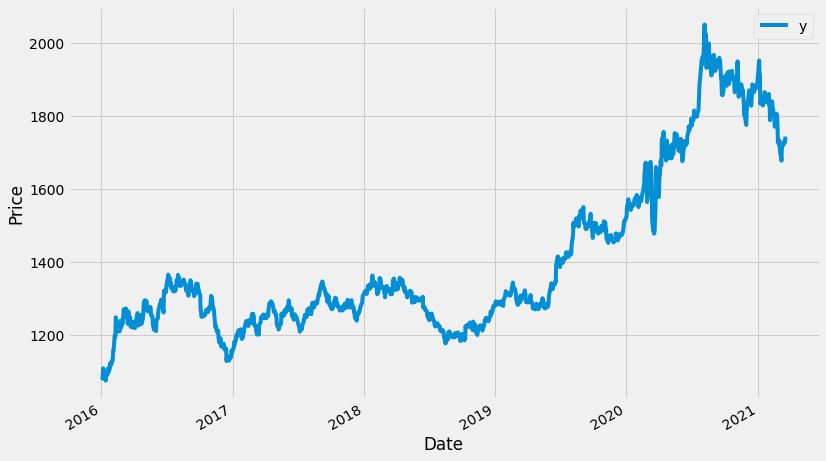

In [ ]:
ax = prophet_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

plt.show()

In [ ]:
model.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=165)

In [ ]:
future.tail()

,ds
1459,2021-08-27
1460,2021-08-28
1461,2021-08-29
1462,2021-08-30
1463,2021-08-31


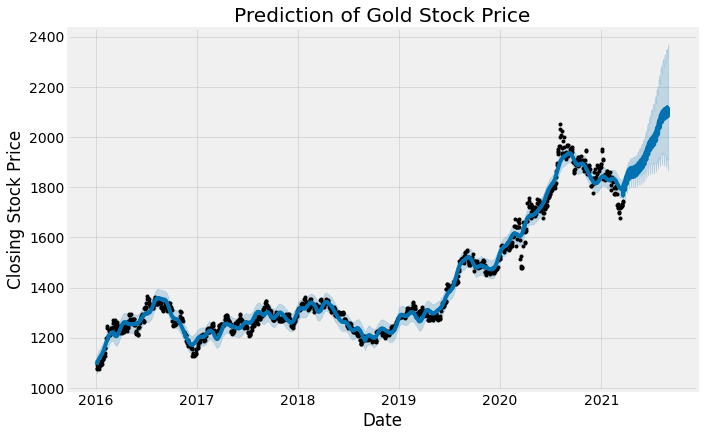

,ds,yhat,yhat_lower,yhat_upper
1459,2021-08-27,2117.091649,1912.036557,2351.547592
1460,2021-08-28,2082.275771,1871.075298,2320.870991
1461,2021-08-29,2083.198400,1866.909558,2319.038359
1462,2021-08-30,2121.112254,1914.370947,2363.709334
1463,2021-08-31,2121.950237,1911.426020,2368.815923


In [ ]:
predictions=model.predict(future)
model.plot(predictions)
plt.title("Prediction of Gold Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

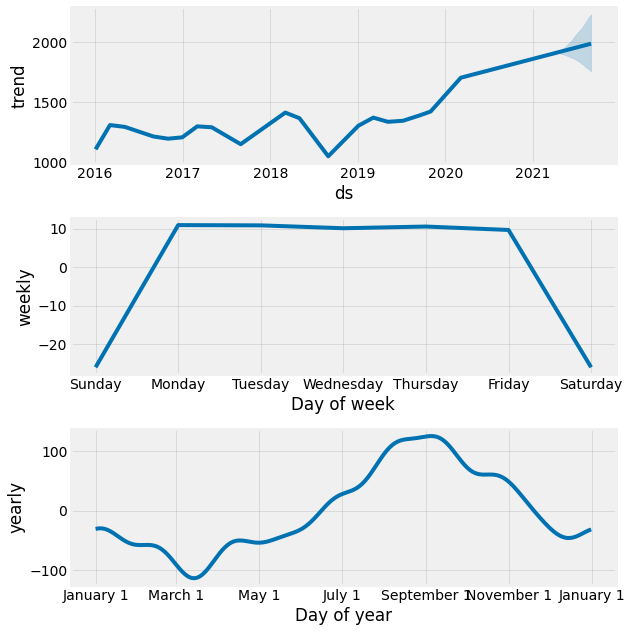

In [ ]:
model.plot_components(predictions)
plt.show()

There is no weekly seasonality 

In [ ]:
predictions=model.predict(future)
predictions[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1459,2021-08-27,2117.091649,1854.949209,2321.886477
1460,2021-08-28,2082.275771,1819.252783,2291.703210
1461,2021-08-29,2083.198400,1814.664903,2304.693795
1462,2021-08-30,2121.112254,1857.316498,2337.106788
1463,2021-08-31,2121.950237,1837.330495,2342.857699
